<a href="https://colab.research.google.com/github/anadiedrichs/curso-aprendizaje-automatico/blob/main/2_5_Cross_Validation_Regresion_Lineal_Multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2_5 - Cross Validation: Regresion Lineal Multiple


* El objetivo de este Notebook es el de ***resolver un problema de regresión generando 'N' modelos entrenados con 'N' conjuntos de entrenamiento distintos y evaluados con 'N' conjuntos de test distintos***, particionando los datos con la técnica de ***Cross Validation***.


* Para ello, dado un Dataset, vamos a particionar 'N' veces los datos con la técnica de particionado ***Cross Validation*** y generar 'N' Modelos, viendo los errores cometidos por estos modelos con los diferentes conjuntos de datos.


* El ejemplo que vamos a realizar consiste en predecir cuantas calorías voy a quemar en función de los minutos que voy a estar corriendo, la velocidad media a la que corro y mi peso. Por ello tenemos un conjunto de datos tomados de forma empírica que nos dan esa relación. Por tanto el objetivo es encontrar los parámetros de la recta que mejor se ajustan a esos datos.


* El ejemplo que vamos a realizar, consiste en predecir cuantas ***calorías quema una persona en función de los minutos que corre, la velocidad a la que corre y su peso corporal***. Por ello tenemos un conjunto de datos tomados de forma empírica que nos dan esa relación.


* El objetivo es encontrar los parámetros $\beta_0, \beta_1, \beta_2, \beta_3$ que ***mejor se ajustan a los datos de entrenamiento***.

<span style="font-size:16px">$$Calorias = \beta_0 + \beta_1 \cdot Tiempo + \beta_3 \cdot Velocidad + \beta_3 \cdot Peso$$</span>


* Para ello vamos a realizar los siguientes pasos:

    1. Carga de Datos
    2. Cambio de estructura de datos a numpy
    3. 'N' Particionados de datos en Entrenamiento y Test
    4. Generación y evaluación de los 'N' modelos con MAE
    5. Conclusiones: Comparativa de resultados

<hr>


* En primer lugar importemos las librerías necesarias:


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error

<hr>


## 1. Carga de Datos


* El primer paso que vamos a realizar es el de cargar los datos que los tenemos en los siguientes ficheros:

***DataSet***: "calories_time_weight_speed.csv"

https://raw.githubusercontent.com/anadiedrichs/curso-aprendizaje-automatico/main/datasets/calories_time_weight_speed.csv



* Para ello ***leeremos el csv con pandas*** (pasandolo a un dataframe), teniendo las siguientes columnas:
    - Calorias
    - Tiempo
    - Peso
    - Velocidad

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/anadiedrichs/curso-aprendizaje-automatico/main/datasets/calories_time_weight_speed.csv")
df.sample(5)

,Calorias,Tiempo,Peso,Velocidad
3933,595.2,34.0,81.1,12.5
4138,830.7,44.2,70.3,15.5
1184,336.1,24.7,63.0,12.5
1795,1131.3,49.4,84.1,15.8
2671,134.6,12.6,58.6,10.5


<hr>


## 2. Cambio de estructura de datos a numpy


* Vamos a pasar los datos de las calorias y el tiempo a una nueva estructura de datos para que scikit-learn puedan trabajar con los datos:
<span></span><br><br>
    - Las ***columna Tiempo, Peso y Velocidad*** representan las variables independientes 'x<sub>n</sub>' y las vamos a pasar a un array de array (***numpy array***)
<span></span><br><br>
    - La ***columna calorias*** que representa la variable dependiente 'y', la vamos a pasar a un ***numpy array***

In [3]:
X = df[['Tiempo', 'Velocidad', 'Peso']].values
y = df['Calorias'].values

<hr>


## 3. 'N' Particionados de datos en Entrenamiento y Test


* En este punto vamos a dividir el dataset en 'N' conjuntos de datos.


* En cada una de las 'N' iteracciones, un conjunto de datos sera conjunto de datos de test y el resto de conjuntos serán datos de entrenamiento.


* En Scikit utilizamos la clase ***KFold(n_splits)*** para dividir el Dataset en ***'N'*** (n_splits) conjuntos.


* En este caso no vamos a obtener unos arrays con los datos de entrenamiento y test; si no, los ***índices de los elementos del Dataset que en cada paso actuarán como entrenamiento y como test***.


* Para el ejemplo que vamos a realizar vamos a dividir el dataset en 10 conjuntos de datos:

In [5]:
k_fold = KFold(n_splits=10)

<hr>


## 4. Generación y evaluación de los 'N' modelos con MAE


* Vamos a generar tantos modelos como particiones hayamos realizado y vamos a evaluarlos con los datos de entrenamiento y test:

In [6]:
l_mae_train = []
l_mae_test = []

for train, test in k_fold.split(X, y):

    # Creo un nuevo objeto de la clase LinearRegression
    reg_mul = linear_model.LinearRegression()

    # Ajusto el modelo
    reg_mul.fit(X[train], y[train])

    # Imprimo el modelo
    print ("\nCalorias = {b0:0.2f} + {b1:0.2f} Tiempo + {b2:0.2f} Velocidad + {b3:0.2f} Peso"
       .format(b0=reg_mul.intercept_, b1=reg_mul.coef_[0], b2=reg_mul.coef_[1], b3=reg_mul.coef_[2]))

    # Prediccion
    y_train_predict = reg_mul.predict(X[train])
    y_test_predict = reg_mul.predict(X[test])

    # Errores
    mae_train = mean_absolute_error(y_true=y[train], y_pred=y_train_predict)
    mae_test = mean_absolute_error(y_true=y[test], y_pred=y_test_predict)
    print("TRAIN - MAE: {error:0.2f}".format(error=mae_train))
    print("TEST - MAE: {error:0.2f}".format(error=mae_test))

    # Guardamos los errores
    l_mae_train.append(mae_train)
    l_mae_test.append(mae_test)


Calorias = -1157.95 + 14.24 Tiempo + 46.27 Velocidad + 8.54 Peso
TRAIN - MAE: 48.65
TEST - MAE: 43.96

Calorias = -1173.56 + 14.27 Tiempo + 46.96 Velocidad + 8.62 Peso
TRAIN - MAE: 48.75
TEST - MAE: 43.89

Calorias = -1161.30 + 14.27 Tiempo + 46.44 Velocidad + 8.54 Peso
TRAIN - MAE: 48.06
TEST - MAE: 49.39

Calorias = -1165.42 + 14.29 Tiempo + 46.66 Velocidad + 8.55 Peso
TRAIN - MAE: 47.81
TEST - MAE: 51.33

Calorias = -1165.95 + 14.25 Tiempo + 46.61 Velocidad + 8.59 Peso
TRAIN - MAE: 48.16
TEST - MAE: 48.45

Calorias = -1163.89 + 14.26 Tiempo + 46.68 Velocidad + 8.54 Peso
TRAIN - MAE: 47.66
TEST - MAE: 52.66

Calorias = -1163.89 + 14.27 Tiempo + 46.66 Velocidad + 8.54 Peso
TRAIN - MAE: 48.02
TEST - MAE: 49.48

Calorias = -1155.83 + 14.25 Tiempo + 46.57 Velocidad + 8.45 Peso
TRAIN - MAE: 48.29
TEST - MAE: 47.12

Calorias = -1173.11 + 14.26 Tiempo + 46.96 Velocidad + 8.61 Peso
TRAIN - MAE: 48.36
TEST - MAE: 47.65

Calorias = -1167.63 + 14.26 Tiempo + 46.79 Velocidad + 8.56 Peso
TRAIN -

<hr>


## 5. Conclusiones: Comparativa de resultados


* En la siguiente gráfica podemos observar en cada generación del modelo con diferentes conjuntos de entrenamiento y test lo siguiente:
<span></span><br><br>
    - El error comentido con el modelo generado en cada iteración con los conjuntos de entrenamiento es más o menos similar, con lo que el algoritmo de aprendizaje genera un modelo muy robusto.
<span></span><br><br>    
    - El error cometido con los datos de test es más variable (lo cual es normal), incluso en ocasiones se comete menos error con los datos de test que con los de entrenamiento.
<span></span><br><br>    
    - Los errores de los modelos tanto con los datos de test como de entrenamiento son muy similares entre sí, con lo que podemos concluir que el algoritmo de aprendizaje con los datos disponibles, genera un modelo muy robusto que geneeraliza bastante bien.

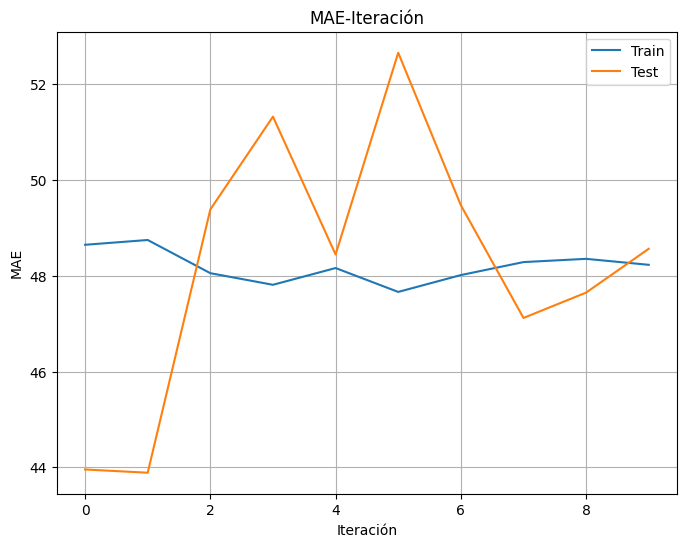

In [7]:
fig, ax =  plt.subplots(figsize=(8, 6))
ax.plot([index for index, value in enumerate(l_mae_train)], [mae for mae in l_mae_train])
ax.plot([index for index, value in enumerate(l_mae_test)], [mae for mae in l_mae_test])
ax.set_title("MAE-Iteración")
ax.set_xlabel("Iteración")
ax.set_ylabel("MAE")
ax.grid(True)
plt.gca().legend(('Train','Test'))
plt.show()